In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Custom color palettes
custom_palette = sns.color_palette("viridis", 10)
custom_palette2 = sns.color_palette("plasma", 15)

# Increase default figure size for better readability
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

In [ ]:
# 1. Load the Dataset
print("Loading the Electric Vehicle Population Data for Washington State...")
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# 2. Initial Data Inspection

# Display the first few rows
print("\n--- First 5 rows of the dataset ---")
df.head()

print(f"Number of rows: {df.shape[0]} ")
print(f"Number of columns: {df.shape[1]}")

print("\n-- Summary Statistics ---")
df.describe(include='all').T

# Checking missing values
missing_values=df.isnull().sum()
missing_percent=(missing_values/len(df))*100
missing_data = pd.concat([missing_values, missing_percent], axis=1)
missing_data.columns=['Counts','Percentage']
missing_data=missing_data[missing_data['Counts']>0].sort_values('Percentage',ascending=False)
print("\n--- Missing Values Analysis ---")
print(missing_data)

# 2. Simple, clear bar chart with percentages
plt.figure(figsize=(10, 6))
ax = missing_data['Percentage'].plot(kind='bar', color='skyblue')
plt.title('Missing Values by Column', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Percentage Missing', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of bars
for i, p in enumerate(missing_data['Percentage']):
    plt.text(i, p + 0.5, f'{p:.1f}%', ha='center')

plt.tight_layout()
plt.show()
 


In [ ]:
df.head()
df.tail()

In [ ]:
# Fill missing values where appropriate
df['Country']=df['County'].fillna('Unknown')
df['City']=df['City'].fillna('Unknown')
df['Postal Code']=df['Postal Code'].fillna(0)


df_with_range = df.dropna(subset=['Electric Range'])
print(f"Original Dataset: {df.shape[0]}")
print(f"Dataset with valid Electric Range : {df_with_range.shape[0]} rows.")
 
duplicates=df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")



Original Dataset: 232230
Dataset with valid Electric Range : 232203 rows.
Duplicate rows: 0


In [ ]:
#Questions No1: Which car manufacturers are the most commonly used for EVs in Washington? 

make_counts=df['Make'].value_counts().reset_index()
make_counts.columns=['Make','Count']
make_counts['Percentage']=(make_counts['Count']/make_counts['Count'].sum()*100).round(2)
print(make_counts.head(10))

fig=plt.figure(figsize=(16,10))

#chart1
ax1=fig.add_subplot(121)
sns.barplot(x='Count',y='Make',data=make_counts.head(10),palette=custom_palette)
ax1.set_title('Top 10 Manufacturers',fontsize=17)
ax1.set_xlabel('Number of Vehciles',fontsize=14)
ax1.set_ylabel('Manufacturer',fontsize=14)

#chart 2
ax2=fig.add_subplot(122)
#other categories
others_count=make_counts.iloc[10:]['Count'].sum()
top_makes_pie=pd.concat([make_counts.head(10),pd.DataFrame(
    {'Make':['Others'],'Count':[others_count],'Percentage':[make_counts.iloc[10:]['Percentage'].sum()]}
)],ignore_index=True)

ax2.pie(top_makes_pie['Count'], labels=top_makes_pie['Make'], autopct='%1.1f%%',
       startangle=90, explode=[0.05]*len(top_makes_pie), 
       colors=sns.color_palette('viridis', len(top_makes_pie)))
ax2.set_title('Market Share of EV Manufacturers', fontsize=16)
ax2.axis('equal')

plt.tight_layout()
plt.show()

fig = px.bar(make_counts.head(15), x='Count', y='Make', orientation='h',
             title='Top 15 EV Manufacturers in Washington State',
             labels={'Count': 'Number of Vehicles', 'Make': 'Manufacturer'},
             color='Count', text='Percentage', 
             color_continuous_scale=px.colors.sequential.Viridis)
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()


 QUESTIONS 2,4
Max Electric Range:337.0
Min Electric Range:0.0
Cars with max electric range
       Make    Model  Model Year  Electric Range
6156  TESLA  MODEL S        2020           337.0
Number of cars with max range : 1
Is the max range car unique to one model? No
******* Minimum Range cars ********
             Make           Model  Model Year  Electric Range
4           TESLA         MODEL Y        2021             0.0
15          TESLA         MODEL Y        2023             0.0
31           FORD  MUSTANG MACH-E        2023             0.0
37            KIA            NIRO        2021             0.0
49          TESLA         MODEL 3        2021             0.0
...           ...             ...         ...             ...
141513      SMART       EQ FORTWO        2019             0.0
149556     TOYOTA           MIRAI        2023             0.0
153160     NISSAN           ARIYA        2025             0.0
182035      TESLA        ROADSTER        2008             0.0
212869  CHEVR

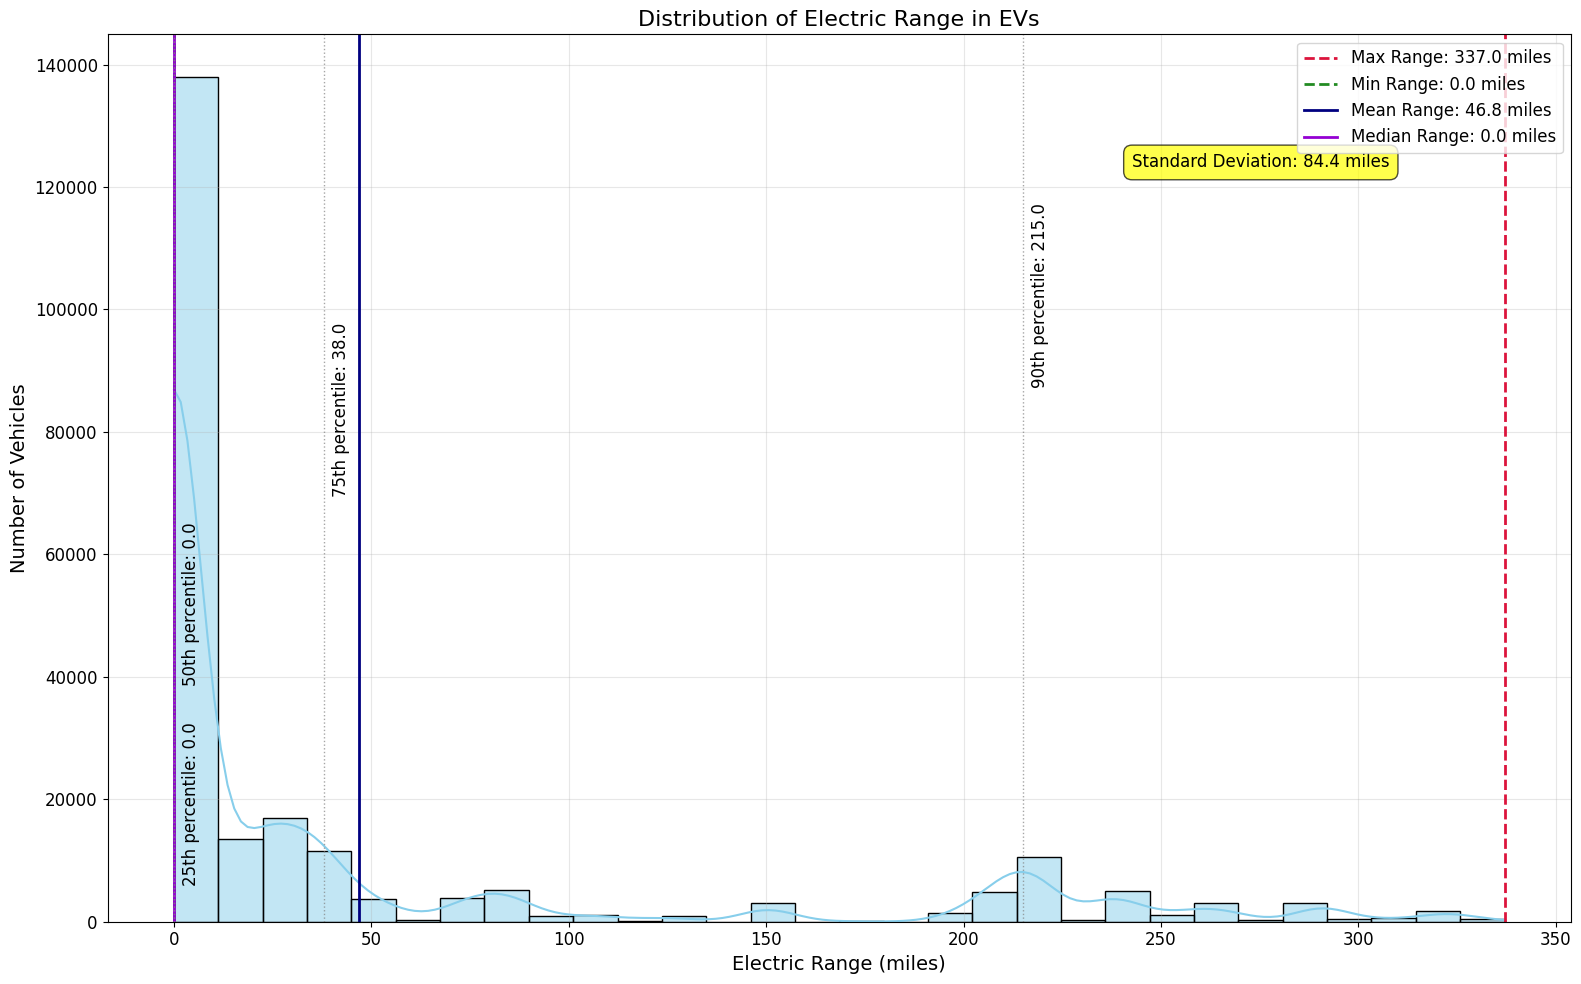

In [55]:

# QUESTIONS 2, 3, 4: What are the highest and lowest electric ranges? Are they unique?
print(" QUESTIONS 2,4")
#max and min range
max_range=df_with_range['Electric Range'].max()
min_range=df_with_range['Electric Range'].min()

print(f"Max Electric Range:{max_range}")
print(f"Min Electric Range:{min_range}")

max_range_cars=df_with_range[df_with_range['Electric Range']==max_range]
print('Cars with max electric range')
max_range_unique=max_range_cars[['Make','Model','Model Year','Electric Range']].drop_duplicates()
print(max_range_unique)
print(f"Number of cars with max range : {len(max_range_unique)}")
print(f"Is the max range car unique to one model? {'No' if len(max_range_unique)>1 or len(max_range_cars)>len(max_range_unique) else 'Yes'}")

#cars with minimum range
min_range_cars=df_with_range[df_with_range['Electric Range']==min_range]
print('******* Minimum Range cars ********')
min_range_unqiue=min_range_cars[['Make','Model','Model Year','Electric Range']].drop_duplicates()
print(min_range_unqiue)
print(f"Number of vehicles with min range: {len(min_range_cars)}")
print(f"Is minimum range cars unique? {'No' if len(min_range_unqiue)>1 or len(min_range_cars)>len(min_range_unqiue) else 'Yes'}")

#visualization 
plt.figure(figsize=(16,10))

ax = sns.histplot(df_with_range['Electric Range'], kde=True, bins=30, color='skyblue')

mean_range = df_with_range['Electric Range'].mean()
median_range = df_with_range['Electric Range'].median()
std_range = df_with_range['Electric Range'].std()


plt.axvline(max_range, color='crimson', linestyle='--', linewidth=2, 
            label=f'Max Range: {max_range} miles')
plt.axvline(min_range, color='forestgreen', linestyle='--', linewidth=2, 
            label=f'Min Range: {min_range} miles')
plt.axvline(mean_range, color='navy', linestyle='-', linewidth=2, 
            label=f'Mean Range: {mean_range:.1f} miles')
plt.axvline(median_range, color='darkviolet', linestyle='-', linewidth=2, 
            label=f'Median Range: {median_range:.1f} miles')

# Add annotations
plt.annotate(f'Standard Deviation: {std_range:.1f} miles', 
             xy=(0.7, 0.85), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.7))

# Add percentile lines
percentiles = [25, 50, 75, 90]
for p in percentiles:
    p_value = np.percentile(df_with_range['Electric Range'], p)
    plt.axvline(p_value, color='gray', linestyle=':', linewidth=1, alpha=0.7)
    plt.text(p_value+2, ax.get_ylim()[1]*0.9*(p/100), f'{p}th percentile: {p_value:.1f}', 
             rotation=90, verticalalignment='top')

plt.title('Distribution of Electric Range in EVs', fontsize=16)
plt.xlabel('Electric Range (miles)', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


*********    How range varies between car makers and models  *******
Average EV Range by Manufacturers
                    Make   Avg_Range   Std_Range  Count
18                JAGUAR  194.836820   87.535650    239
45  WHEEGO ELECTRIC CARS  100.000000    0.000000      3
40                 TH!NK  100.000000    0.000000      5
8              CHEVROLET   84.749926  104.318599  16919
11                  FIAT   79.566234   22.128632    770
31                NISSAN   70.647991   57.650323  15457
37                 SMART   61.817427    6.342307    241
39                 TESLA   61.123541  106.723147  99692
3         AZURE DYNAMICS   56.000000    0.000000      4
33               PORSCHE   54.206383   89.646063   1410


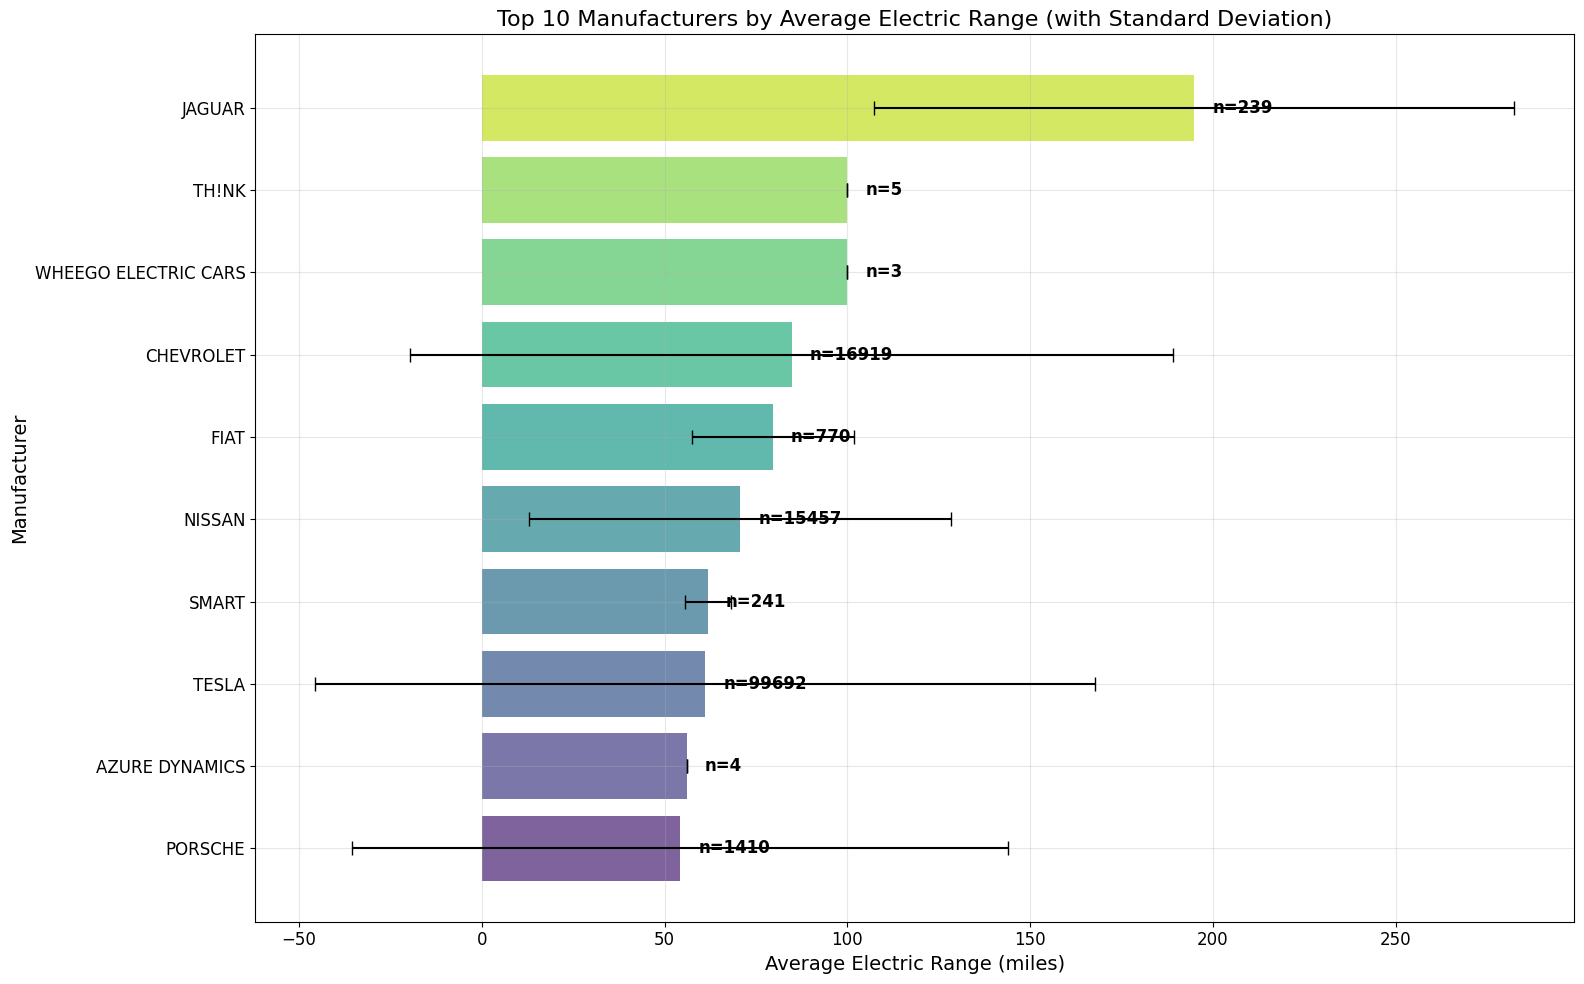

In [ ]:
#Question 5: How range varies between car makers and models
print('*********    How range varies between car makers and models  *******')

avg_range_by_make=df_with_range.groupby('Make').agg({
    'Electric Range':['mean','std','count']
}).reset_index()
avg_range_by_make.columns=['Make','Avg_Range','Std_Range','Count']
avg_range_by_make=avg_range_by_make.sort_values('Avg_Range',ascending=False)

print('Average EV Range by Manufacturers')
print(avg_range_by_make.head(10)) 



****   Top Cities adopting EV's  *****
        City  Count  Percentage
0    Seattle  36865   15.874349
1   Bellevue  11369    4.895578
2  Vancouver   8361    3.600310
3    Redmond   8079    3.478879
4    Bothell   7614    3.278646
5     Renton   6626    2.853206
6   Kirkland   6623    2.851914
7  Sammamish   6564    2.826508
8    Olympia   5565    2.396331
9     Tacoma   5078    2.186625


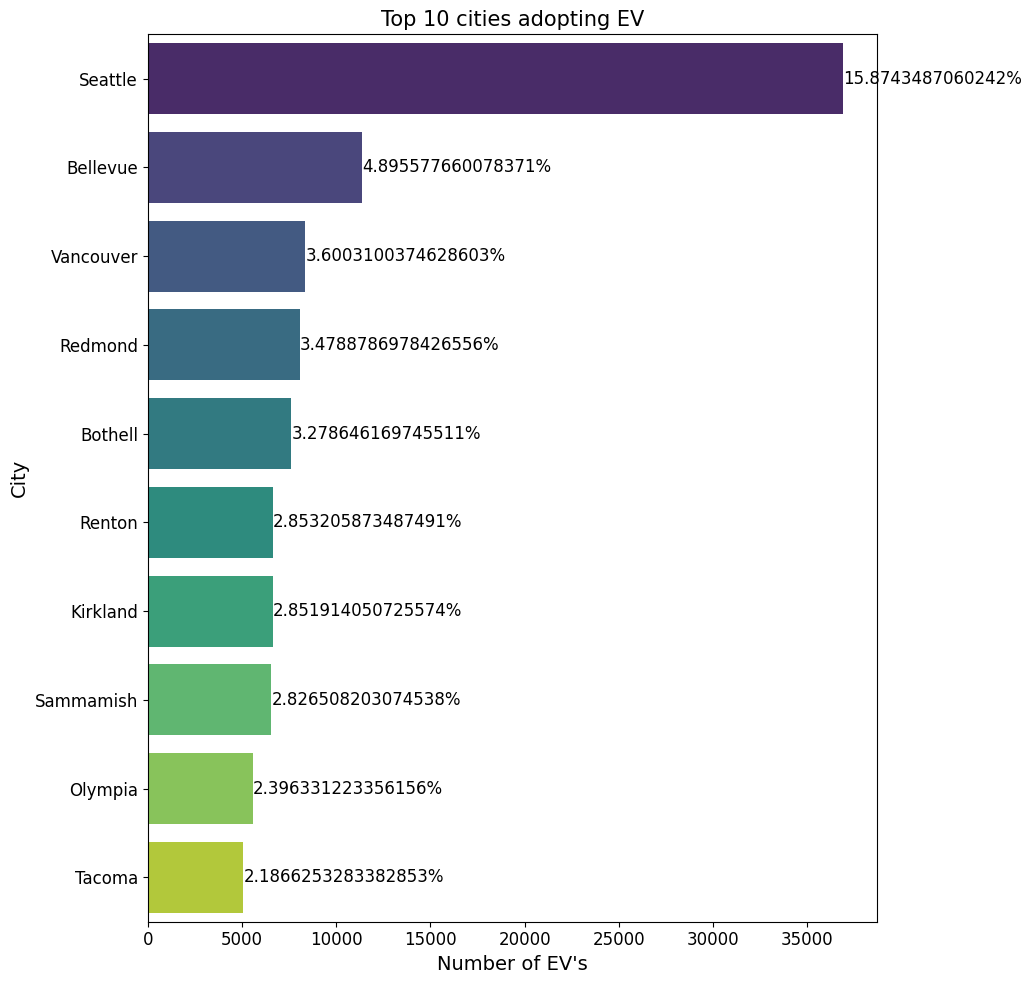

<Figure size 1400x800 with 0 Axes>

In [83]:
#Question 6 Top Cities adopting EV's
print("****   Top Cities adopting EV's  *****")
city_counts=df['City'].value_counts().reset_index()
city_counts.columns=['City','Count']
city_counts['Percentage']=(city_counts['Count']/city_counts['Count'].sum()*100)
print(city_counts.head(10))

fig=plt.figure(figsize=(18,10))

ax1=fig.add_subplot(121)
sns.barplot(x='Count',y='City',data=city_counts.head(10),palette='viridis',ax=ax1)
ax1.set_title('Top 10 cities adopting EV',fontsize=15)
ax1.set_xlabel("Number of EV's",fontsize=14)
ax1.set_ylabel("City",fontsize=14)

#innotations
for i, row in enumerate(city_counts.head(10).iterrows()):
    ax1.text(row[1]['Count'] + 10, i, f"{row[1]['Percentage']}%", va='center')

others_count = city_counts.iloc[10:]['Count'].sum()
top_cities_pie = pd.concat([city_counts.head(10), 
                          pd.DataFrame({'City': ['Others'], 'Count': [others_count], 
                                       'Percentage': [city_counts.iloc[10:]['Percentage'].sum()]})], 
                         ignore_index=True)

wedges, texts, autotexts = ax2.pie(top_cities_pie['Count'], labels=top_cities_pie['City'], 
                                  autopct='%1.1f%%', startangle=90, 
                                  explode=[0.05 if i < 5 else 0 for i in range(len(top_cities_pie))],
                                  colors=sns.color_palette('viridis', len(top_cities_pie)))

plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=12)

ax2.set_title('Distribution of EVs by City', fontsize=16)
ax2.axis('equal')

plt.tight_layout()
plt.show()


plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=12)

ax2.set_title('Distribution of EVs by City', fontsize=16)
ax2.axis('equal')

plt.tight_layout()
plt.show()
 
fig = px.bar(city_counts.head(15), x='Count', y='City', orientation='h',
            title='Top 15 Cities Adopting EVs in Washington State',
            labels={'Count': 'Number of Vehicles', 'City': 'City'},
            color='Count', text='Percentage', 
            color_continuous_scale=px.colors.sequential.Viridis)
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

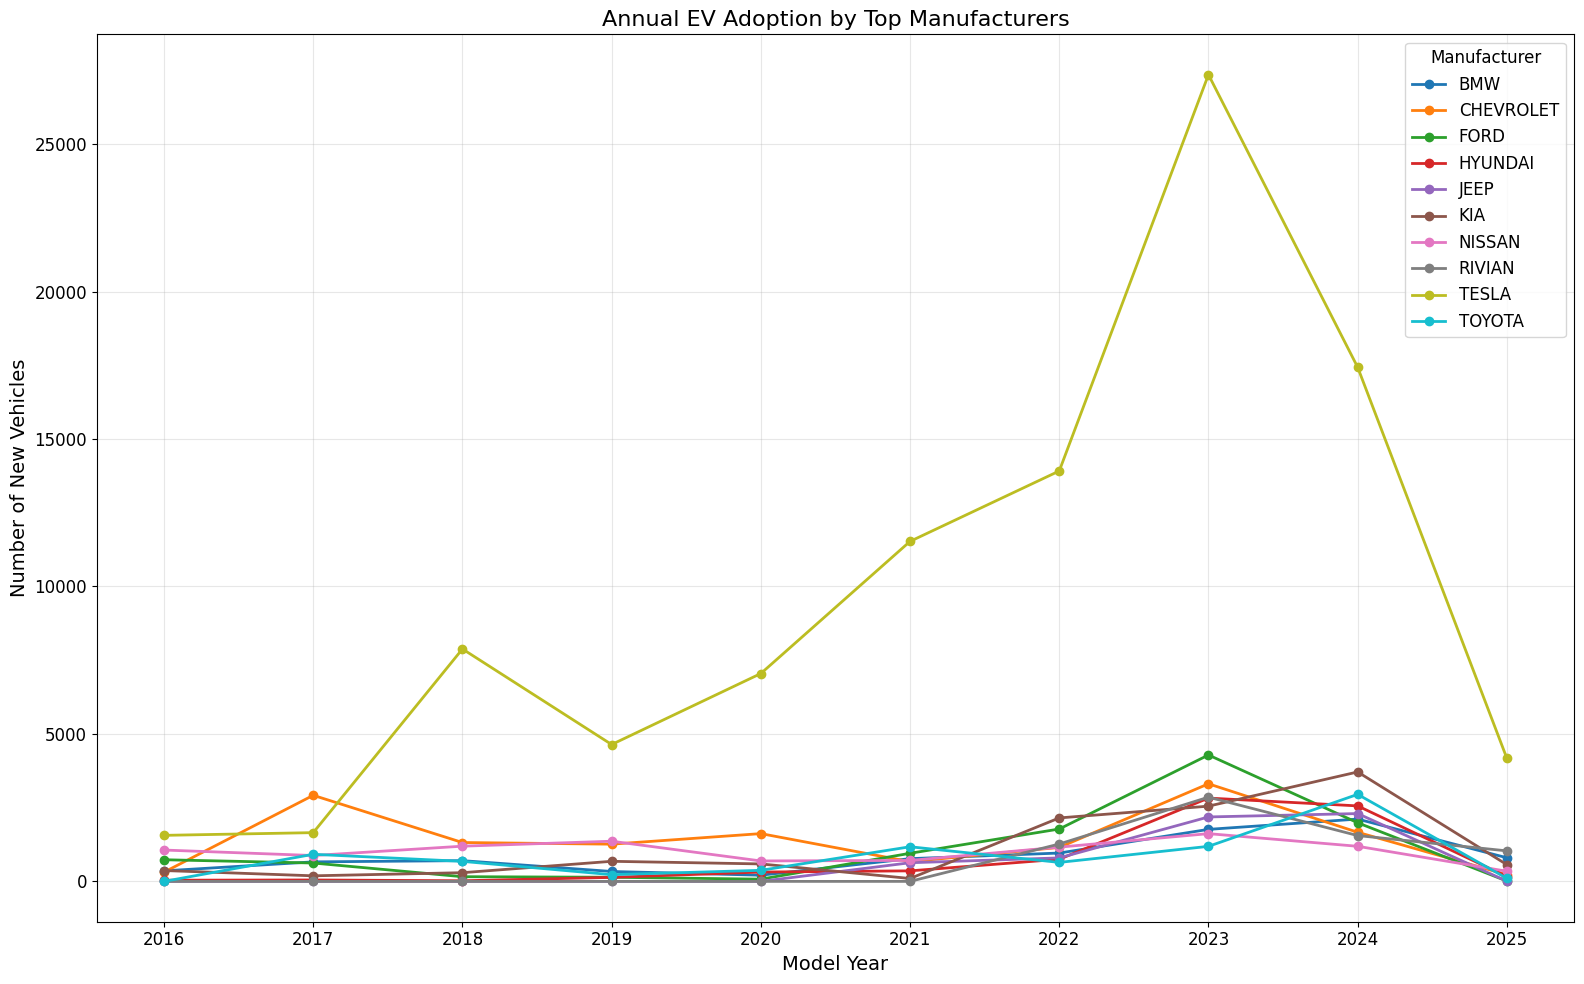

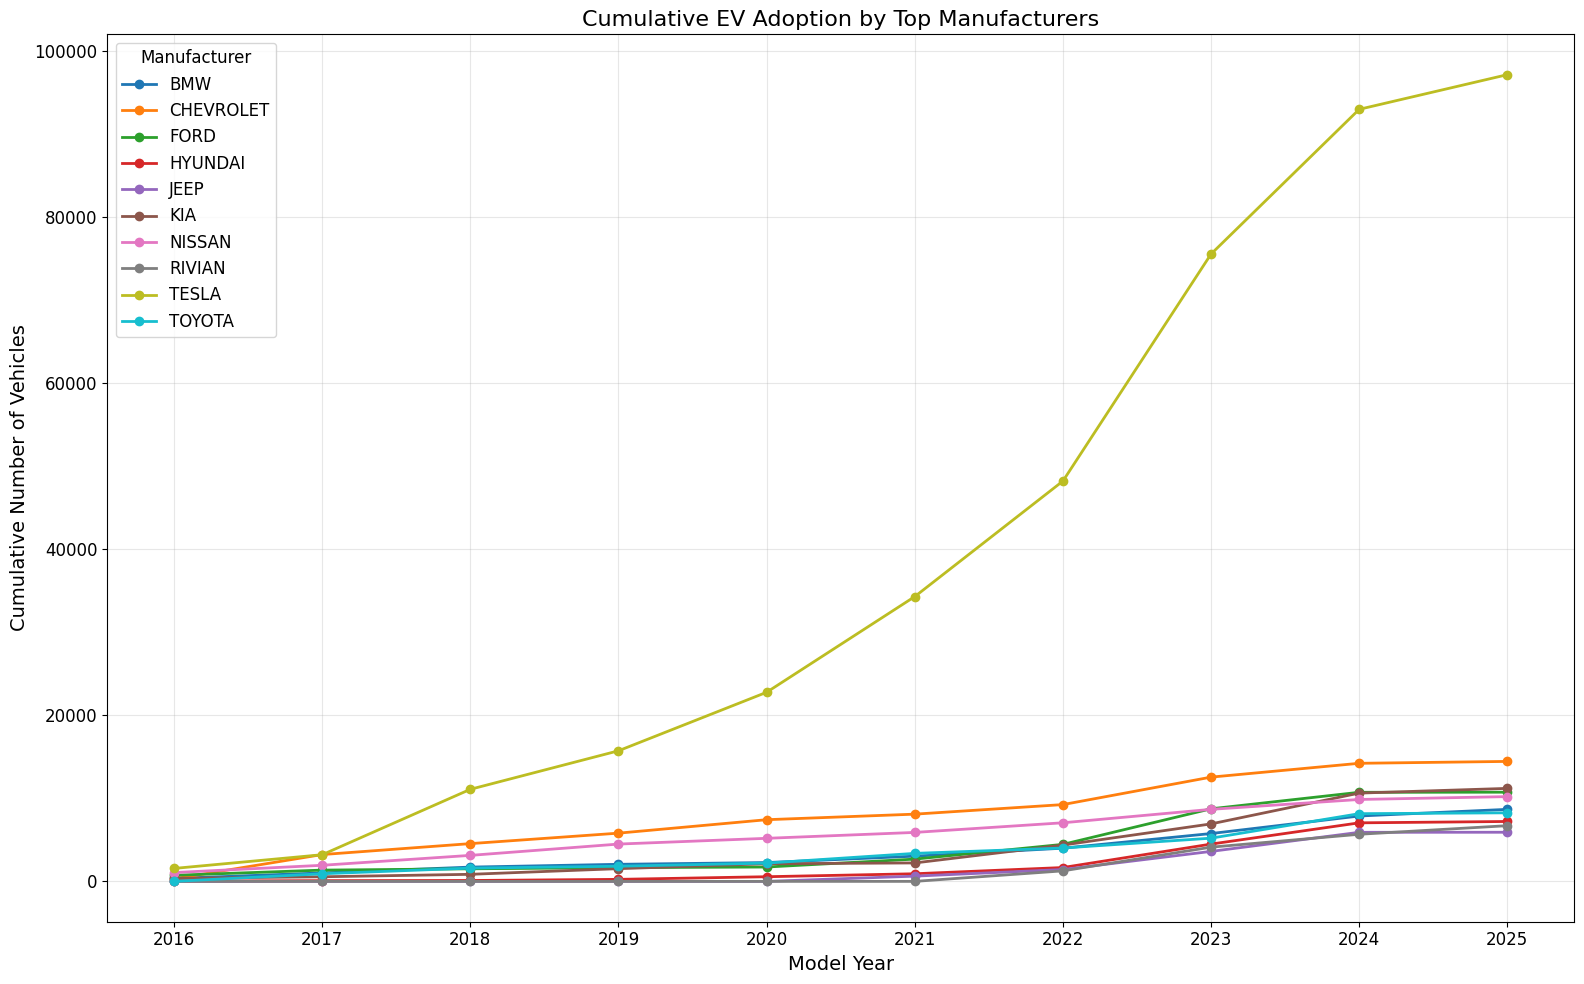

<Figure size 1600x1000 with 0 Axes>

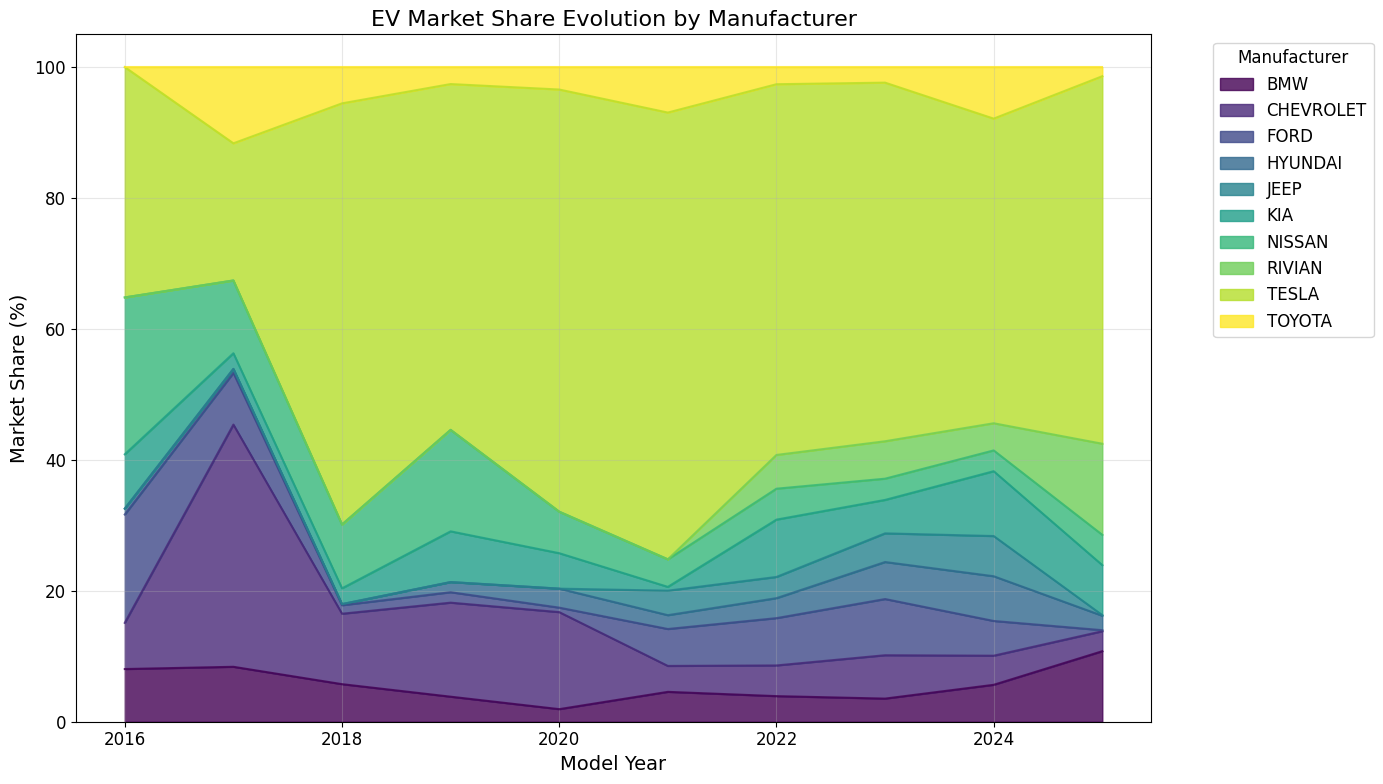

In [88]:
# QUESTION 7: How does the EV adoption rate vary among car makers over the years?

df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')
adoption_by_year_make = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')
current_year = df['Model Year'].max()
recent_years = list(range(current_year - 9, current_year + 1))
recent_adoption = adoption_by_year_make[adoption_by_year_make['Model Year'].isin(recent_years)]

top_10_makes = make_counts.head(10)['Make'].tolist()
top_recent_adoption = recent_adoption[recent_adoption['Make'].isin(top_10_makes)]
adoption_pivot = top_recent_adoption.pivot(index='Model Year', columns='Make', values='Count').fillna(0)

cumulative_adoption = adoption_pivot.cumsum()

#Year by year trend
plt.figure(figsize=(16, 10))
for make in adoption_pivot.columns:
    plt.plot(adoption_pivot.index, adoption_pivot[make], marker='o', linewidth=2, label=make)

plt.title('Annual EV Adoption by Top Manufacturers', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Number of New Vehicles', fontsize=14)
plt.legend(fontsize=12, title='Manufacturer')
plt.grid(True, alpha=0.3)
plt.xticks(adoption_pivot.index)
plt.tight_layout()
plt.show()

# 2. Cumulative Adoption
plt.figure(figsize=(16, 10))
for make in cumulative_adoption.columns:
    plt.plot(cumulative_adoption.index, cumulative_adoption[make], marker='o', linewidth=2, label=make)

plt.title('Cumulative EV Adoption by Top Manufacturers', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Cumulative Number of Vehicles', fontsize=14)
plt.legend(fontsize=12, title='Manufacturer')
plt.grid(True, alpha=0.3)
plt.xticks(cumulative_adoption.index)
plt.tight_layout()
plt.show()


fig = px.area(adoption_pivot.reset_index().melt(id_vars='Model Year', var_name='Make', value_name='Count'),
             x='Model Year', y='Count', color='Make',
             title='EV Adoption Trends by Top Manufacturers',
             labels={'Count': 'Number of Vehicles', 'Model Year': 'Year'})
fig.show()


market_share = adoption_pivot.div(adoption_pivot.sum(axis=1), axis=0) * 100

plt.figure(figsize=(16, 10))
market_share.plot(kind='area', stacked=True, colormap='viridis', alpha=0.8)
plt.title('EV Market Share Evolution by Manufacturer', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Market Share (%)', fontsize=14)
plt.legend(fontsize=12, title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



                City  Avg_Range   Std_Range  Median_Range  Count
164     Yarrow Point  78.627451  107.065946           0.0    153
57     Friday Harbor  77.404339   95.944114          35.0    507
49           Everson  76.355769  101.077584          29.5    104
41         Eastsound  73.014535   82.174686          42.0    344
162          Woodway  69.201754   97.741141          14.5    114
90            Medina  67.247396  102.184182           0.0    384
80           Langley  66.193651   95.097188          21.0    315
32        Clyde Hill  65.075269  103.185305           0.0    372
115    Port Townsend  64.551129   88.738831          25.0    753
153           Vashon  64.537158   84.544152          26.0    767
102    Normandy Park  63.716561   95.606084           3.0    314
101  Nine Mile Falls  63.531915   92.213692          21.0    141
132            Selah  62.867188   93.398846          18.5    128
50         Fall City  62.618375   98.547875           0.0    283
131    Sedro-Woolley  60.

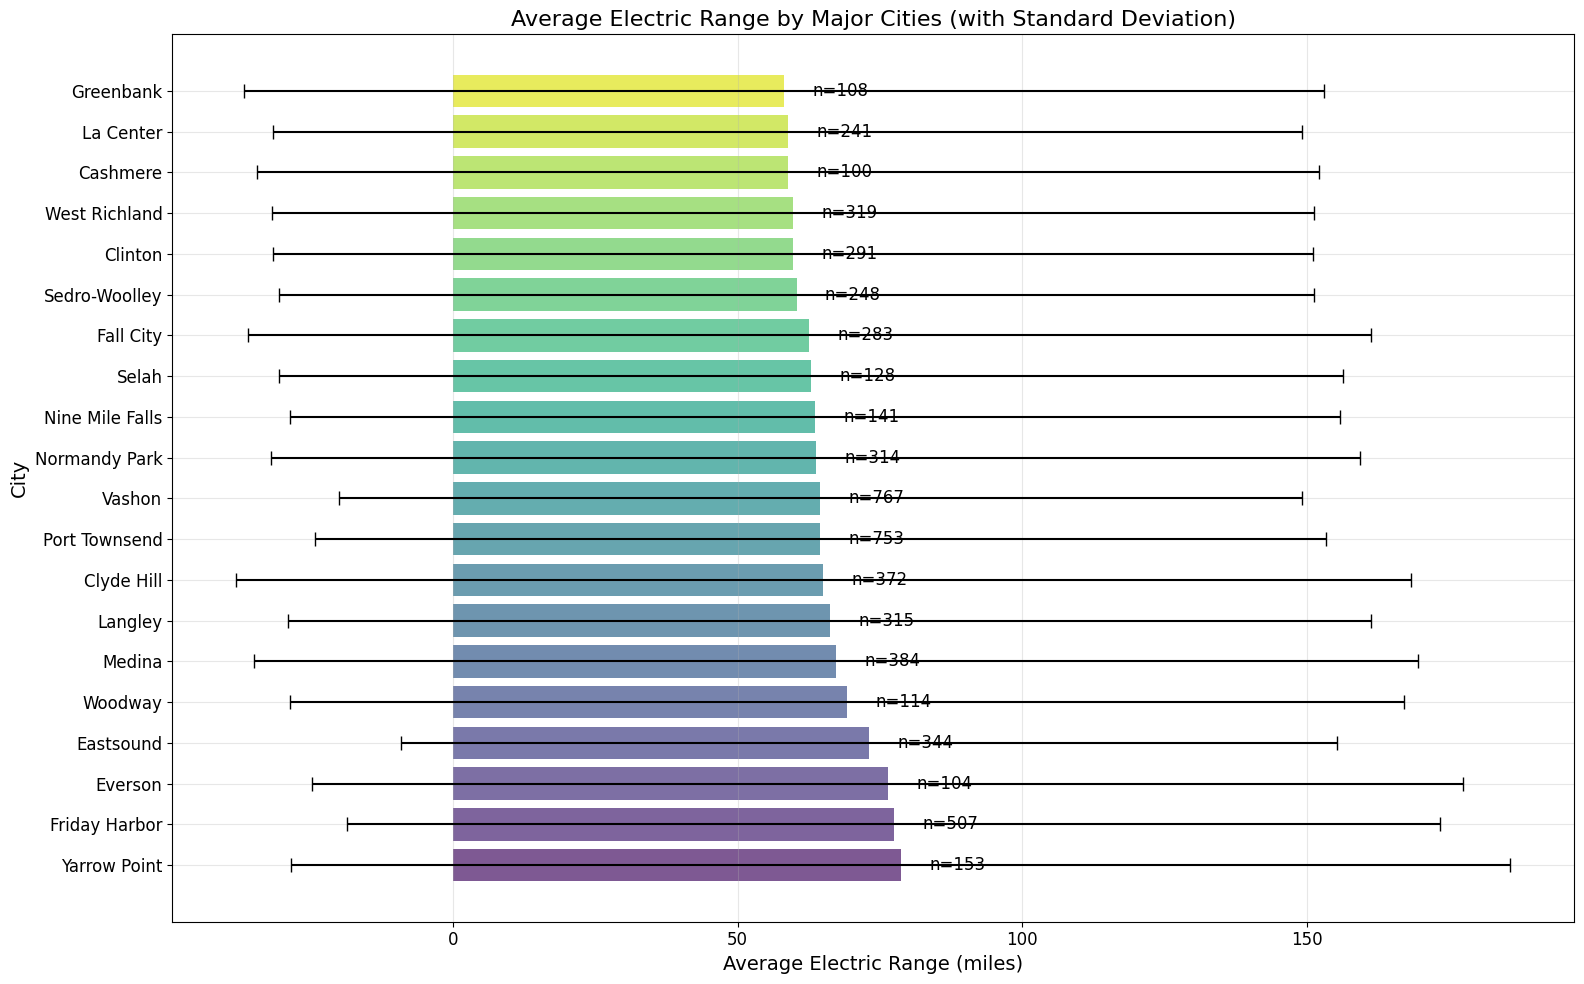


for Electric Range differences between cities:
F-statistic: 8.7837
p-value: 0.00000000
Statistically significant difference: Yes


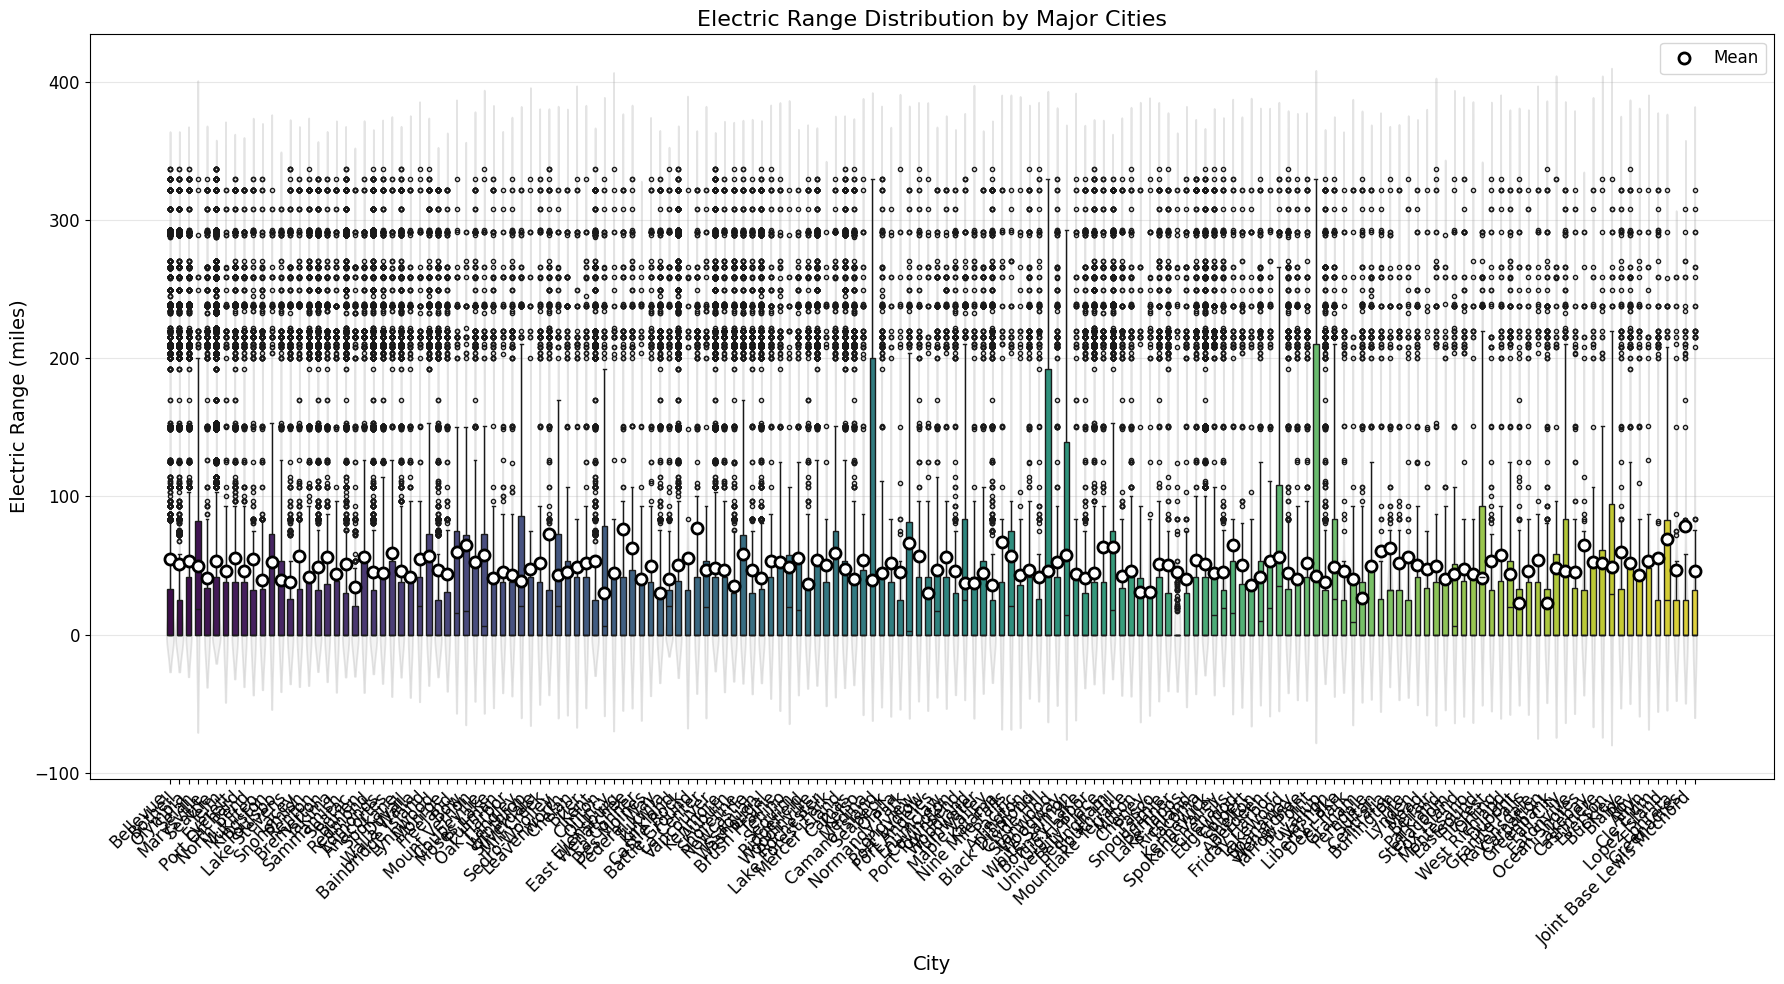

In [ ]:
# QUESTION 8: Is there a correlation between the electric range and the city of an EV?

significant_cities = df_with_range['City'].value_counts()
significant_cities = significant_cities[significant_cities >= 100].index.tolist()
df_significant_cities = df_with_range[df_with_range['City'].isin(significant_cities)]

city_range_stats = df_significant_cities.groupby('City').agg({
    'Electric Range': ['mean', 'std', 'median', 'count']
}).reset_index()
city_range_stats.columns = ['City', 'Avg_Range', 'Std_Range', 'Median_Range', 'Count']
city_range_stats = city_range_stats.sort_values('Avg_Range', ascending=False).head(20)
print(city_range_stats)


plt.figure(figsize=(16, 10))
bars = plt.barh(city_range_stats['City'], city_range_stats['Avg_Range'], 
               xerr=city_range_stats['Std_Range'], 
               color=sns.color_palette('viridis', len(city_range_stats)), alpha=0.7,
               error_kw={'ecolor': 'black', 'capsize': 5})

for i, (_, row) in enumerate(city_range_stats.iterrows()):
    plt.text(row['Avg_Range'] + 5, i, f"n={int(row['Count'])}", va='center')

plt.title('Average Electric Range by Major Cities (with Standard Deviation)', fontsize=16)
plt.xlabel('Average Electric Range (miles)', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


f_stat, p_value = stats.f_oneway(*[df_significant_cities[df_significant_cities['City'] == city]['Electric Range'] 
                                 for city in significant_cities])
print(f"\nfor Electric Range differences between cities:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.8f}")
print(f"Statistically significant difference: {'Yes' if p_value < 0.05 else 'No'}")

plt.figure(figsize=(18, 10))
ax = sns.boxplot(x='City', y='Electric Range', data=df_significant_cities, 
                palette='viridis', fliersize=3, width=0.6)

sns.violinplot(x='City', y='Electric Range', data=df_significant_cities, 
              inner=None, color="0.8", alpha=0.2, width=0.9)

means = df_significant_cities.groupby('City')['Electric Range'].mean()
plt.plot(range(len(means)), means, 'o', color='white', markersize=8, 
         markeredgecolor='black', markeredgewidth=2, label='Mean')

plt.title('Electric Range Distribution by Major Cities', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Electric Range', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()